# Lecture 3: Exploring Probability

We pretty much always want to start notebooks with this line to do standard imports and make sure figures show up in the notebook:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## More work with modules

You should have put the function from lecture2.ipynb in a file we can use as a module.  Our code was:


    import numpy.random as random
    import numpy as np
    
    def sim2coins(ntests):
        # simulate ntests tosses of 2 coins 
        coin1=random.rand(ntests) > 0.5
        coin2=random.rand(ntests) > 0.5
        return np.sum( coin1 == coin2 )/ntests
        
You should have placed this in a file named sim2coins.py .     

__Next import and test your code: change the number of simulations below.__

In [2]:
import sim2coins as s2c

ntests = 5E4
print(s2c.sim2coins( int(ntests) ) )

0.50066


__Now, modify sim2coins to check for the fraction of cases where coin1 is tails (==False) and coin2 is heads (==True).  Run that code below.__  Note that you will need to use `np.logical_and`; you can also get help on it in the code box below, using ?.  For convenience, you should also make it convert ntests to an integer using the `int()` function.

Python will automatically compile a module the first time you import it.  However, to save time it won't automatically recompile a routine after that.  We have to force it to.

To get python to incorporate our changes, just reimporting won't do it.  __Do `reload(s2c)` in the below code box, and test your code again in the box below.__  

(Note: you could also go to the Kernel menu above and choose 'Restart', then the Cell menu above and do 'run all'; but that's overkill).

In [3]:
from imp import reload
reload(s2c)

<module 'sim2coins' from '/root/AstronomySoftware/astro3705/python/sim2coins.py'>

## Testing the frequentist definition of probability

Let's calculate the fraction of successes for different numbers of trials.  __Note there are a couple of items I want you to predict and discuss with your group!__

In [4]:
nsims_list=np.array([100,500,1000,5000,1E4,5E4,1E5,1E6])

nsims_list=nsims_list.astype(int) # can convert the array to integers all at once

# PREDICT AND DISCUSS:
result=nsims_list*0.
print(result)


[0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
# PREDICT AND DISCUSS:
for i,nsims in enumerate(nsims_list):
     result[i]=s2c.sim2coins(nsims )

print(result)
        
#PUT YOUR CODE FOR PLOTTING IN THIS CODE BOX! 
#WHEN YOU MODIFY TO LOOP THROUGH 20 TIMES, DO THAT IN THIS BOX TOO
#  (MAKE SURE THE PLOT COMMAND IS INSIDE THE LOOP!)

[0.53     0.492    0.511    0.5108   0.5013   0.49716  0.49694  0.500133]


# Plotting and exploring

__In the code cell above, plot the fraction of successes as a function of the number of simulations.__

Now, make a series of modifications:

__1) Plot the result with 0.25 (the expected probability) subtracted from it, as a function of nsims, with the below changes.__
- Plot the points as green stars (look at the help on `plt.plot()` ).  
- Use a logarithmic x axis (look at the help on `plt.xscale` or `plt.semilogx`)
- Use a y axis range from -0.05 to +0.05 (look at the help on `plt.ylim()`)

__2) By adding another, outer for loop, repeat the calculation 20 times, overplotting all the results.__
		If you put all the plot commands in the same code box (within the loop), all the plots will be shown on the same axes, as we want.

__3) Overplot the line y=0 to help guide the eye.__

__Extra: If your group is done and you are waiting around for other groups, add code to overplot the average of all the results at each `nsims` value as a line.  Add labels to your axes and a title to the figure.  Remember that you can type plt. and then hit tab to get a list of all the functions in the `plt` (actually `pyplot`) library.__

## Simulating Dice

__Here are 3 ways for generating dice rolls.  Check that they give similar results in the average using np.mean().__ Note that I have not filled in all the code for the `np.ceil()` method as an exercise for you to fill in.

In [6]:
nsims=1000

#Floor: 
rolls_f=np.floor(random.rand(nsims)*6) + 1

#Round:
rolls_r=np.round(random.rand(nsims)*6 + 0.5)

#Ceil:
#rolls_c = np.ceil( ??? ) # Your code here


## Plotting histograms

Below we plot a histogram of die rolls.

__In the below code box, use the `bins` and `range` keywords with `plt.hist()` to plot the results in 6 bins, centered at 1,2,3,...6.  This is not how the bins will be set up by default!__  

As usual, you can do `?plt.hist()` to see the help information.

(array([179.,   0., 141.,   0., 171.,   0., 171.,   0., 181., 157.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

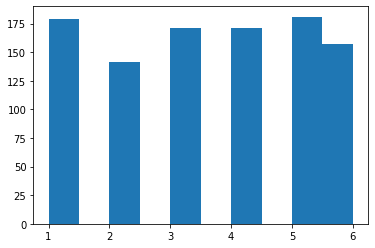

In [7]:
plt.hist(rolls_f)

# Multi-Dimensional Arrays 

A numpy array need not have only one dimension.  E.g.:

    img = np.zeros( (200,200) )

will create a 200 x 200 array, with zeros everywhere.  

Note: `np.zeros()` and similar routines can take a tuple of dimension sizes as input, for arbitrary numbers of dimensions. 



## Rolling 10 dice

Two options: the slow way and the fast way.  First, some setup:

In [8]:
nsims = int(2E4)
rolls=np.floor(random.rand(nsims,10)*6 ) + 1


In [9]:
%%timeit 
# %%timeit will determine how long the code in this cell takes to execute.
# This calculation does it the slow way 
total_roll=np.zeros(nsims) 
for i in arange(nsims):
     total_roll[i]=np.sum(rolls[i,:])

98.9 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
#This code does things the fast way
total_roll=np.sum(rolls,axis=1)


### Plotting the results

__Use `plt.hist(total_roll)` to examine the results of your simulation in the below code box... adjust the number of bins and range as necessary to show all the values in the array__ (you may find `np.min()` and `np.max()` helpful)

In [ ]:
total_roll=np.sum(rolls,axis=1)
# add histogram plotting code here!

### Simulating more dice

We can just simulate once, and take sums over different subsets with array slicing.

__Modify the below code cell to plot histograms for, 2, 5, 10, and 100 rolls.__

In [ ]:
nsims=int(2E4)
rolls=np.floor(random.rand(nsims,100)*6 ) + 1

# add up to get results for the sum of 5 die rolls
total_roll_5=np.sum(rolls[:,0:5],axis=1)
#or just go ahead and plot that quantity:
plt.hist(np.sum(rolls[:,0:5],axis=1),range=[0,30],bins=30)


# Saving output to a file

You can use `plt.savefig("<filename>")` in the above code box to store the plot in a file named `<filename>`.

__Save your plot in a PDF file named spam.pdf__.  Then, using the Mac finder/linux file explorer or the below code box, view the file.  In ipython, you can issue shell commands by preceding them by '!'.

# If you have extra time

Try changing one of your plots to use a different font, choosing based upon your own aesthetic preferences.  See the example at http://matplotlib.org/examples/pylab_examples/fonts_demo.html  .

If you find something you like, you may want to change your default font; see http://matplotlib.org/users/customizing.html .

Try rolling even more dice, or plotting the mean roll (using `np.mean`) instead of the sum.